# Linear Regresion (Advertising Data)
ISLR Linear Regression ÏÑúÏ†ÅÏùÑ Ï∞∏Ï°∞ÌïòÍ≥† ISLRÏóêÏÑú Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏßÄÎßå, Ï±Ö ÌùêÎ¶ÑÏùÑ Ï†ÑÏ†ÅÏúºÎ°ú Îî∞ÎùºÍ∞ÄÏßÄÎäî ÏïäÎäîÎã§.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## 1. Load Datasets
Advertising Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö© (https://www.statlearning.com/resources-first-edition)

In [2]:
# Load Advertising dataset
ad_data = pd.read_csv('./data/Advertising.csv', index_col=0)
ad_data.head(3)

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3

In [3]:
# data Ï†ïÎ≥¥ ÌôïÏù∏
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
# data ÌÜµÍ≥ÑÏπò ÌôïÏù∏
ad_data.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

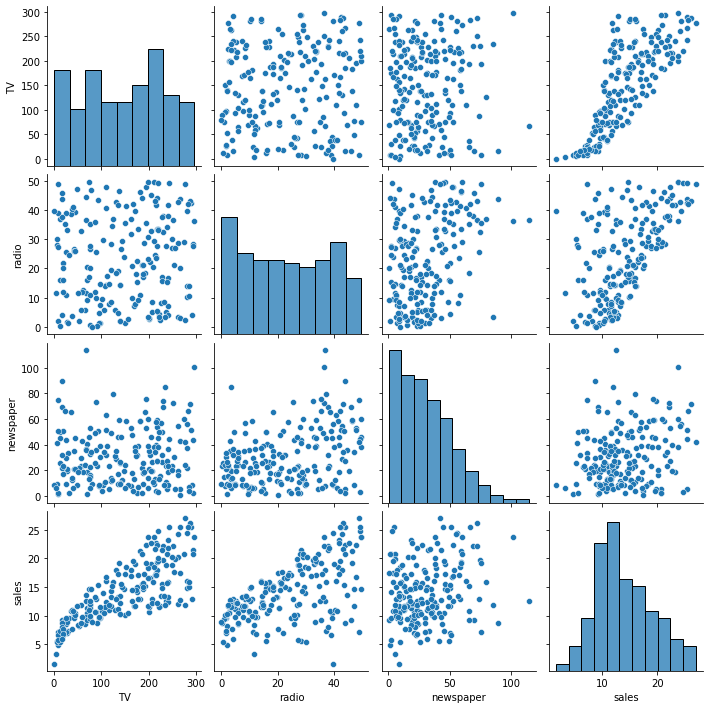

In [5]:
# data ÌäπÏÑ±ÏùÑ pairplotÏúºÎ°ú Í∞ÑÎã®Ìûà ÌôïÏù∏
sns.pairplot(ad_data)

----
**TIP)** *Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î∂ÑÎ•ò*       
    
- Mesokurtic :  Ï≤®ÎèÑÍ∞Ä ÎÇÆÏßÄÎèÑ ÎÜíÏßÄÎèÑ ÏïäÏùÄ Î∂ÑÌè¨    
- Leptokurtic : Ï≤®ÎèÑÍ∞Ä ÌÅ∞ Î∂ÑÌè¨    
- Platykurtic : Ï≤®ÎèÑÍ∞Ä ÎÇÆÏùÄ Î∂ÑÌè¨    
- Bimodel : ÏåçÎ¥â Î∂ÑÌè¨ (ÎëêÍ∞úÏùò Í∑πÎåÄÍ∞í)   
- Nagative Skewness (Left-skewed): Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨ (ÏôúÎèÑ < 0)     
- Positive Skewness (Right-skewed): ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨ (ÏôúÎèÑ > 0)  

----

## 2. Simple Linear Regression

$Y = \beta_{0} + \beta_{1}X$
    
Ïù¥ Ïû•ÏóêÏÑúÎäî TVÎ•º XÎ°ú salesÎ•º YÎ°ú ÏÇ¨Ïö© 

### 2-1. seaborn Regression Plot 

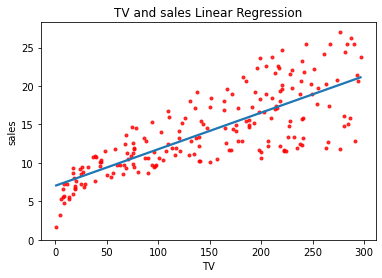

In [6]:
# sns Ïù¥Ïö©Ìïú Í∞ÑÎã®Ìïú ÌöåÍ∑Ä ÏãúÍ∞ÅÌôî
sns.regplot(x=ad_data['TV'], y=ad_data['sales'], order=1, ci=None, scatter_kws={'color': 'r', 's': 9})
plt.title('TV and sales Linear Regression')
plt.ylim(ymin=0)

plt.show()

### 2-2. sklearn Regression

In [8]:
# sklearn linear regression model Í∞ùÏ≤¥Ìôî
regr = skl_lm.LinearRegression()

# XÍ∞í, yÍ∞í ÏÑ†Î≥Ñ 
# sales = ùõΩ0 + ùõΩ1*TV
X = ad_data['TV'].values.reshape(-1, 1)
y = ad_data['sales']

# linear regression ÌïôÏäµ
regr.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('intercept: ', regr.intercept_)    # Ï†àÌé∏: ùõΩ0
print('coefficient: ', regr.coef_[0])    # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ1

intercept:  7.032593549127694
coefficient:  0.04753664043301976


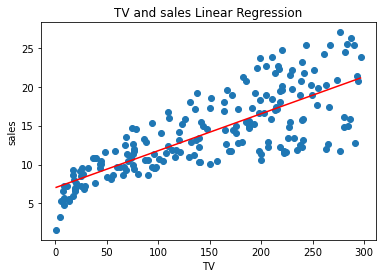

In [9]:
# regression Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.scatter(x=ad_data['TV'], y=ad_data['sales'])

X_sample = np.array([[ad_data['TV'].min()], [ad_data['TV'].max()]])
y_pred = regr.predict(X_sample)
plt.plot(X_sample, y_pred, c='red')

plt.xlabel('TV')
plt.ylabel('sales')
plt.title('TV and sales Linear Regression')

plt.show()

### 2-3. Ìï¥ÏÑù

sales = 7.0325 + 0.4753 * TV 

----

**TIP)** *SST, SSE, SSR*

- Ìé∏Ï∞®(Deviation): Í¥ÄÏ∏°ÏπòÍ∞Ä ÌèâÍ∑†ÏúºÎ°úÎ∂ÄÌÑ∞ Îñ®Ïñ¥Ï†∏ ÏûàÎäî Ï†ïÎèÑ, Ï¶â ÌèâÍ∑†Í≥ºÏùò Ï∞®Ïù¥
- Ïò§Ï∞®(Error): ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïòÏó¨ Ï∂îÏ†ïÎêú Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò Ï∞®Ïù¥, Ï¶â ÏòàÏ∏°Í∞íÏù¥ Ï†ïÌôïÌïòÏßÄ Î™ªÌïú Ï†ïÎèÑ
- ÏûîÏ∞®(residual): ÌèâÍ∑†Ïù¥ ÏïÑÎãàÎùº ÌöåÍ∑ÄÏãù Îì±ÏúºÎ°ú Ï∂îÏ†ïÎêú Í∞íÍ≥ºÏùò Ï∞®Ïù¥, Ï¶â Ï∂îÏ†ïÎêú Í∞íÏù¥ ÏÑ§Î™ÖÌï† Ïàò ÏóÜÏñ¥ÏÑú ÏïÑÏßÅ ÎÇ®ÏïÑÏûàÎäî Ìé∏Ï∞®Î°ú Ìé∏Ï∞®Ïùò ÏùºÎ∂Ä

![img_01](./image/regression_01.png)

- SST(Total sun of squares): YÏùò Ï¥ù Î≥ÄÎèô $(SST = SSE + SSR)$
- SSE(Error sum of squares): Ï∂îÏ†ïÍ∞íÍ≥º Ïã§Ï†úÍ∞í Ï∞®Ïù¥(Ïò§Ï∞®)Ïùò Ï†úÍ≥±, Ïò§Ï∞®Ïóê ÎåÄÌïú Î≥ÄÎèô
- SSR(Residual sum of squares): ÏßÅÏÑ†ÏúºÎ°ú ÏÑ§Î™ÖÏù¥ Î∂àÍ∞ÄÎä•Ìïú Î≥ÄÎèô, ÏßÅÏÑ†Ïóê ÎåÄÌïú Î≥ÄÎèô
- MSE(Mean Squares Error): Ïò§Ï∞®Í∞Ä Ïª§ÏÑú Í∞íÏù¥ Ïª§ÏßÄÎäî Í±¥ÏßÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏïÑ Í∞íÏù¥ Ïª§ÏßÄÎäîÏßÄ Ïïå Ïàò ÏóÜÎäî SSEÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞ $(MSE = SSE / (n-2))$
- MSR(Regression Mean Squares): ÏûîÏ∞® ÌèâÍ∑† Ï†úÍ≥±Ïùò Ìï© $(MSR = SSR / 1)$
- $R^{2}$(Í≤∞Ï†ïÍ≥ÑÏàò): ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÏñºÎßàÎßåÌÅº ÏÑ§Î™Ö Ìï¥Ï£ºÎäîÏßÄÎ•º Í∞ÄÎ¶¨ÌÇ§Îäî ÏßÄÌëú, Ï¶â ÏÑ§Î™ÖÎ†•Ïù¥Î©∞ ÎÜíÏùÑ ÏàòÎ°ù ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º ÎßéÏù¥ ÏÑ§Î™ÖÌïòÎäî Í≤É. ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÎßåÏúºÎ°ú ÏÉÅÏäπÌïòÎØÄÎ°ú Í≤∞Ï†ïÍ≥ÑÏàòÎßåÏùÑ Í∞ÄÏßÄÍ≥† Ïú†Ïö©ÏÑ± ÌåêÎã®ÏùÄ Î¨¥Î¶¨Í∞Ä ÏûàÏùå $(R^{2} = SSR / SST, R^{2} = 1 - (SSE / SST))$
- $Adjusted R^{2}$(Ï°∞Ï†ïÎêú Í≤ΩÏ†ïÍ≥ÑÏàò): ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Îã®Ïàú Ï¶ùÍ∞ÄÍ∞Ä Í≤∞Ï†ïÍ≥ÑÏàòÎ•º ÏÉÅÏäπÏãúÌÇ§Îäî Í≤ÉÏùÑ Î∞©ÏßÄ $(1 - (n-1)(1-R^{2})/(n-p-1))$, ($p:$ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò)

----

In [11]:
# ÏûîÏ∞® Í≥ÑÏÇ∞
y_pred = regr.predict(np.array(ad_data['TV']).reshape(-1, 1))
rasiduals = ad_data['sales'] - y_pred
rasiduals.describe()    # ÏûîÏ∞® ÌÜµÍ≥ÑÏπò ÌôïÏù∏

count    2.000000e+02
mean    -1.634248e-15
std      3.250458e+00
min     -8.385982e+00
25%     -1.954522e+00
50%     -1.912655e-01
75%      2.067109e+00
max      7.212369e+00
Name: sales, dtype: float64

In [12]:
# SST, SSE, SSR Í∞í ÌôïÏù∏
sst = ((ad_data['sales'] - ad_data['sales'].mean())**2).sum()
sse = ((ad_data['sales'] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst)
print('SSE: ', sse)
print('SSR: ', ssr)
print('SSE+SSR: ', sse+ssr)

SST:  5417.14875
SSE:  2102.5305831313517
SSR:  3314.6181668686504
SSE+SSR:  5417.148750000002


In [13]:
# R^2, Adjusted R^2 Í∞í ÌôïÏù∏
r2 = ssr/sst
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

R2:  0.6118750508500713
Adjusted R2:  0.6099148238341625


In [14]:
# sklearn r2_score() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ R^2Í∞í ÌïúÎ≤àÏóê ÏÇ∞Ï∂ú
r2_score(ad_data['sales'], y_pred)

0.611875050850071

<br/>

**Í≤∞Î°†)**   

*'TV' ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî 'Sales' Ï¢ÖÏÜç Î≥ÄÏàòÏóê ÎåÄÌï¥ 0.6 Ï†ïÎèÑÏùò ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÑÎã§.    
Ïù¥Îäî, Îß§Ïö∞ ÎÜíÏùÄ ÏàòÏπòÏù¥Î©∞ ÌòÑÏã§ÏóêÏÑúÏùò Î¨∏Ï†úÎäî Î≥¥ÌÜµ 0.2 ~ 0.3 Ï†ïÎèÑÏùò ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÎåÄÎ∂ÄÎ∂ÑÏù¥Îã§.*

<br/>


## 3. Multiple Linear Regression

$Y = \beta_{0}X_{0} + \beta_{1}X_{1} + \beta_{2}X_{2}$ $...$

In [15]:
# Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
ad_data.corr()    # corr() Ìï®ÏàòÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÏÇ¨Ïö©

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

<br/>

**Í≤∞Í≥ºÌï¥ÏÑù**      

- TVÏôÄ salesÎäî Í∞ïÌïú ÏñëÏ†Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (0.78)ÏùÑ Í∞ÄÏßÑÎã§.
- radioÏôÄ salesÎäî ÎöúÎ†∑Ìïú ÏñëÏ†Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (0.57)ÏùÑ Í∞ÄÏßÑÎã§.
- newspaperÏôÄ salesÎäî ÏïΩÌïú ÏñëÏ†Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (0.22)Î•º Í∞ÄÏßÑÎã§.
- 3Í∞ÄÏßÄ Î≥ÄÏàòÎ•º Î™®Îëê ÏÇ¨Ïö©Ìïú Î™®Îç∏ regr1Í≥º 'TV', 'radio' 2Í∞ÄÏßÄ Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìïú regr2 Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î≥∏Îã§.

### 3-1. Î™®Îç∏ ÌïôÏäµ

In [60]:
# Î™®Îì† Î≥ÄÏàòÎ•º ÌôúÏö©Ìïú Î™®Îç∏ ÌïôÏäµ
# sklearn linear regression Í∞ùÏ≤¥Ìôî
regr1 = skl_lm.LinearRegression()

# TV, radio, newspaper ÏÑ∏ Î≥ÄÏàòÏùò ÎåÄÌïú sales ÌöåÍ∑Ä
# ÎèÖÎ¶Ω, Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÌï†
# sales = ùõΩ0*TV + ùõΩ1*radio + ùõΩ2*newspaper + ùõΩ3
X = ad_data[['TV', 'radio', 'newspaper']]
y = ad_data[['sales']]

# linear regression ÌïôÏäµ
regr1.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('intercept: ', regr1.intercept_[0])              # Ï†àÌé∏: ùõΩ0
print('TV coefficient: ', regr1.coef_[0][0])           # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ1
print('radio coefficient: ', regr1.coef_[0][1])        # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ2
print('newspaper coefficient: ', regr1.coef_[0][2])    # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ3

intercept:  2.9388893694594085
TV coefficient:  0.04576464545539761
radio coefficient:  0.18853001691820453
newspaper coefficient:  -0.00103749304247629


In [61]:
# TV, radio 2Í∞ÄÏßÄ Î≥ÄÏàòÎ•º ÌôúÏö©Ìïú Î™®Îç∏
# sklearn linear regression Í∞ùÏ≤¥Ìôî
regr2 = skl_lm.LinearRegression()

# TV, radio Îëê Î≥ÄÏàòÏùò ÎåÄÌïú sales ÌöåÍ∑Ä
# ÎèÖÎ¶Ω, Ï¢ÖÏÜç Î≥ÄÏàò Î∂ÑÌï†
# sales = ùõΩ0 + ùõΩ1*TV + ùõΩ2*radio
X = ad_data[['TV', 'radio']]
y = ad_data[['sales']]

# linear regression ÌïôÏäµ
regr2.fit(X, y)

# ÌöåÍ∑ÄÍ≥ÑÏàò, Ï†àÌé∏ Í∞í Ï∂úÎ†•
print('intercept: ', regr2.intercept_[0])              # Ï†àÌé∏: ùõΩ0
print('TV coefficient: ', regr2.coef_[0][0])           # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ1
print('radio coefficient: ', regr2.coef_[0][1])        # ÌöåÍ∑ÄÍ≥ÑÏàò: ùõΩ2

intercept:  2.9210999124051362
TV coefficient:  0.04575481510107615
radio coefficient:  0.1879942266203092


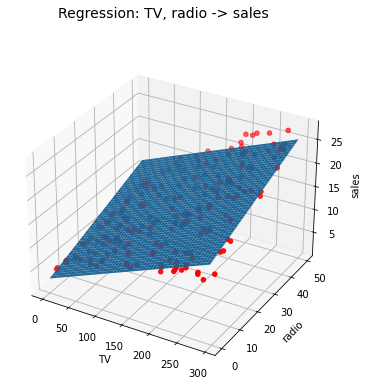

In [62]:
# TV, radio ÎèÖÎ¶Ω Î≥ÄÏàòÏóê ÎåÄÌïú sales Ï¢ÖÏÜçÎ≥ÄÏàò ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(8, 6))
ax3d = plt.axes(projection="3d")
fig.suptitle('Regression: TV, radio -> sales', fontsize=14)

# ÌèâÎ©¥ ÏãúÍ∞ÅÌôî
tv = np.arange(ad_data['TV'].min(), ad_data['TV'].max())             # TV Î≥ÄÏàò Î∂ÑÌè¨
radio = np.arange(ad_data['radio'].min(), ad_data['radio'].max())    # radio Î≥ÄÏàò Î∂ÑÌè¨
x1, x2 = np.meshgrid(tv, radio, indexing='xy')    # TV, radio Î≥ÄÏàò 2Ï∞®Ïõê Í≤©ÏûêÎ°ú Î≥ÄÌôò
z = np.zeros((radio.size, tv.size))
for (i, j), _ in np.ndenumerate(z):
    z[i, j] = x1[i, j]*regr2.coef_[0][0] + x2[i, j]*regr2.coef_[0][1] + regr2.intercept_[0]    # ÌïôÏäµÎêú ÌöåÍ∑ÄÍ≤∞Í≥ºÏóê Îî∞Îùº salesÍ∞í Í≤∞Ï†ï
ax3d.plot_surface(x1, x2, z)

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
ax3d.scatter3D(ad_data['TV'], ad_data['radio'], ad_data['sales'], c='r')

ax3d.set_xlabel('TV')
ax3d.set_ylabel('radio')
ax3d.set_zlabel('sales')

plt.show()

### 3-2. Î™®Îç∏ ÌèâÍ∞Ä

----
**TIP)** *P-value*    

P-value (Ïú†ÏùòÌôïÎ•†): Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÎßûÎã§Í≥† Í∞ÄÏ†ïÌï† Îïå ÏñªÏùÄ Í≤∞Í≥ºÎ≥¥Îã§ Í∑πÎã®Ï†ÅÏù∏ Í≤∞Í≥ºÍ∞Ä Ïã§Ï†úÎ°ú Í¥ÄÏ∏°Îê† ÌôïÎ•†, ÌäπÏ†ï Í∞í(0.05 or 0.01 Îì±Ïù¥ÎÇò ÏµúÍ∑º 0.005Ïù¥ÌïòÏùò Í∞íÏóêÏÑú 'Ïú†ÏùòÎØ∏' ÌïòÎã§Îäî ÌëúÌòÑÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏùÑ Í∂åÏû•) Î≥¥Îã§ ÏûëÏùÑ Í≤ΩÏö∞ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å

*But) ÏùòÏÇ¨Í≤∞Ï†ïÏóê Ï†àÎåÄÏ†ÅÏù∏ ÏßÄÌëúÍ∞Ä ÏïÑÎãàÎ©∞ Ï∞∏Í≥† ÏûêÎ£å Ï†ïÎèÑÏùò ÏùòÎØ∏     
(P-valueÎäî Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ ÎßûÎã§ ÎùºÎäî Ï†ÑÏ†úÌïòÏóê Í∞íÏù¥ÎØÄÎ°ú ÎåÄÎ¶ΩÍ∞ÄÏÑ§Í≥ºÎäî Î≥ÑÍ∞úÏù¥Î©∞, Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ï∞∏Ïùº ÌôïÎ•†ÏùÑ ÎúªÌïòÎäî Í≤ÉÎèÑ ÏïÑÎãàÎã§.)*

----

In [54]:
# ÏûîÏ∞® Í≥ÑÏÇ∞
y_pred = regr1.predict(ad_data[['TV', 'radio', 'newspaper']])
rasiduals = ad_data[['sales']] - y_pred
rasiduals.describe()    # ÏûîÏ∞® ÌÜµÍ≥ÑÏπò ÌôïÏù∏

sales
count  2.000000e+02
mean  -9.947598e-16
std    1.672757e+00
min   -8.827687e+00
25%   -8.908135e-01
50%    2.418018e-01
75%    1.189319e+00
max    2.829223e+00

In [55]:
# SST, SSE, SSR Í∞í ÌôïÏù∏
sst = ((ad_data[['sales']] - ad_data[['sales']].mean())**2).sum()
sse = ((ad_data[['sales']] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst.values[0])
print('SSE: ', sse.values[0])
print('SSR: ', ssr)
print('SSE+SSR: ', sse.values[0]+ssr)

SST:  5417.14875
SSE:  556.8252629021872
SSR:  4860.323487097819
SSE+SSR:  5417.148750000007


In [56]:
# R^2, Adjusted R^2 Í∞í ÌôïÏù∏
r2 = ssr/(sst.values[0])
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

R2:  0.8972106381789533
Adjusted R2:  0.896691499987938


In [57]:
# sklearn r2_score() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ R^2Í∞í ÌïúÎ≤àÏóê ÏÇ∞Ï∂ú
r2_score(ad_data['sales'], y_pred)

0.8972106381789522

In [58]:
# Stats model ÌôúÏö© Î™®Îç∏ ÌïôÏäµ Î∞è Í≤∞Í≥º ÌôïÏù∏
lm_mul = smf.ols(formula='sales ~ TV + radio + newspaper', data=ad_data).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:12:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br/>

**Í≤∞Í≥ºÌï¥ÏÑù**      

- F statistic P-valueÍ∞Ä Îß§Ïö∞ ÏûëÏúºÎØÄÎ°ú (1.58e-96) Î™®Îç∏ÏùÄ Ïú†Ìö®Ìï® (ÏµúÏÜåÌïú 1Í∞ú Ïù¥ÏÉÅÏùò variableÏù¥ responseÏôÄ Í¥ÄÎ†® ÏûàÏùå)
- TVÏôÄ radioÏùò P-valueÎäî ÏùòÎØ∏ ÏûàÏúºÎÇò, newspaperÏùò p-valueÎäî 0.86Ïóê Îã¨ÌïòÎØÄÎ°ú "newspaperÍ∞Ä responseÏôÄ Í¥ÄÎ†®Ïù¥ ÏóÜÎã§"ÎùºÎäî null-hypothesisÎ•º Í±∞Î∂Ä Ìï† Ïàò ÏóÜÏùå. Îî∞ÎùºÏÑú newspaper Î≥ÄÏàòÎ•º Î™®Îç∏Ïóê Ìè¨Ìï®ÌïòÍ∏∞Îäî Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùå
- R-squaredÍ∞Ä 0.89Î°ú simple regression (0.612) Î≥¥Îã§ Ï¶ùÍ∞Ä. ÏµúÏÜåÌïú Simple Linear Regression Î≥¥Îã§ Multi Linear RegressionÏù¥ responseÎ•º Îçî Ïûò ÏÑ§Î™Ö(ÏòàÏ∏°) ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùå

In [59]:
# TV, radio ÎëêÍ∞ÄÏßÄÏùò Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏Ïùò Í≤∞Í≥º ÌôïÏù∏
y_pred = regr2.predict(ad_data[['TV', 'radio']])
rasiduals = ad_data[['sales']] - y_pred

# SST, SSE, SSR Í∞í ÌôïÏù∏
sst = ((ad_data[['sales']] - ad_data[['sales']].mean())**2).sum()
sse = ((ad_data[['sales']] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst.values[0])
print('SSE: ', sse.values[0])
print('SSR: ', ssr)
print('SSE+SSR: ', sse.values[0]+ssr)

# R^2, Adjusted R^2 Í∞í ÌôïÏù∏
r2 = ssr/(sst.values[0])
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

SST:  5417.14875
SSE:  556.9139800676184
SSR:  4860.2347699323855
SSE+SSR:  5417.148750000004
R2:  0.8971942610828962
Adjusted R2:  0.8966750401792745


<br/>

**Í≤∞Î°†)**       

*'TV', 'radio' Îëê Í∞ÄÏßÄÏùò Î≥ÄÏàòÎ•º ÌôúÏö©ÌïòÏó¨ Íµ¨Ï∂ïÎêú Î™®Îç∏ÏùÄ salesÎ•º Í∞ÄÏû• Ïûò ÏÑ§Î™ÖÌï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.*

<br/>

----    
**TIP)** *data scaling*    
    
Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î≥Ñ Ï†ïÍ∑úÌôî ÎπÑÍµê Ï∞∏Í≥†ÏûêÎ£å:     
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

- KDE(Kernel Density Estimation): non-parametric Î∞ÄÎèÑÏ∂îÏ†ï Î∞©Î≤ï Ï§ë ÌïòÎÇòÎ°úÏÑú, Ïª§ÎÑêÌï®Ïàò(Kernel Function)Î•º Ïù¥Ïö©ÌïòÏó¨ ÌûàÏä§ÌÜ†Í∑∏Îû® Î∞©Î≤ïÏùò Î¨∏Ï†úÏ†êÏùÑ Í∞úÏÑ†Ìïú Î∞©Î≤ï  
- Kernel Function: ÏõêÏ†êÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ïù¥Î©¥ÏÑú Ï†ÅÎ∂ÑÍ∞íÏù¥ 1Ïù∏ non-negative Ìï®Ïàò (ex. Í∞ÄÏö∞ÏãúÏïà Ìï®Ïàò), Ï£ºÎ°ú Ïª§ÎÑêÌï®ÏàòÎäî Epanechnikov, GaussianÏùÑ ÏÇ¨Ïö©

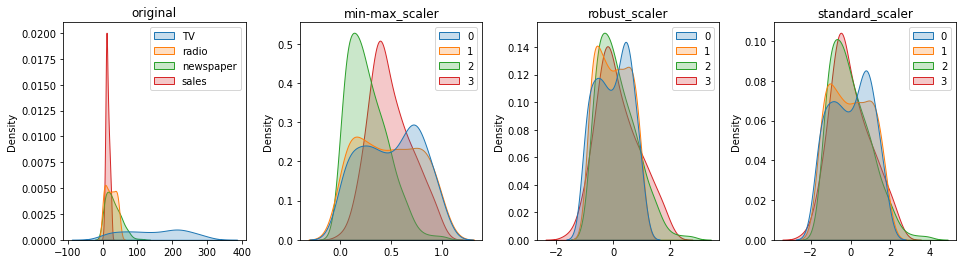

In [63]:
# Ïä§ÏºÄÏùºÎßÅ Î™®ÎìàÎì§ Í∞ùÏ≤¥Ìôî
nm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()
st_scaler = StandardScaler()

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ÏàòÌñâ
nm_norm_X = nm_scaler.fit_transform(ad_data)
rb_norm_X = rb_scaler.fit_transform(ad_data)
st_norm_X = st_scaler.fit_transform(ad_data)

SCALER2DATA = {'original': ad_data,
               'min-max_scaler': nm_norm_X, 
               'robust_scaler': rb_norm_X,
               'standard_scaler': st_norm_X}

# Îç∞Ïù¥ÌÑ∞ KDE ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(1, 4, figsize=[16, 4])
fig.subplots_adjust(wspace=0.3)
for i, (k, v) in enumerate(SCALER2DATA.items()):
    sns.kdeplot(data=v, shade=True, ax=axs[i], label=['TV', 'radio', 'newspaper', 'sales'])
    axs[i].set_title(k)
    
plt.show()

----

# Linear Regression (Credit Data)

## 1. Load Datasets

In [3]:
# Load Advertising dataset
cr_data = pd.read_csv('./data/Credit.csv', index_col=0)
cr_data.head(3)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580

In [4]:
# data Ï†ïÎ≥¥ ÌôïÏù∏
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [5]:
# data ÌÜµÍ≥ÑÏπò ÌôïÏù∏
cr_data.describe()

Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

        Education      Balance  
count  400.000000   400.000000  
mean    13.450000   520.015000  
std      3.125207   459.758877  
min      5.000000     0.000000  
25%     11.000000    68.750000  
50%     14.000000   459.500000  
75%     16.000000   863.000000  
max     20.000000  1999.000000

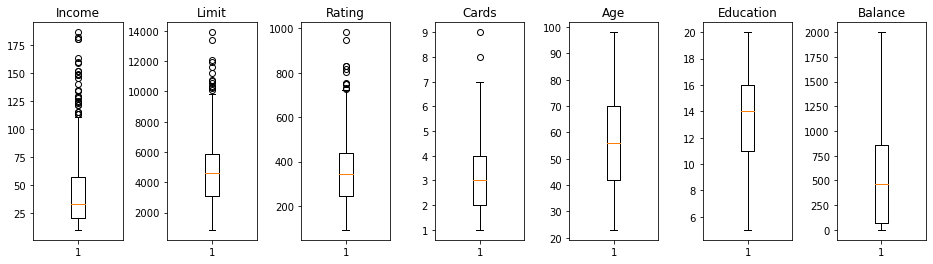

In [6]:
def show_box(df, cols):
    # Ïó∞ÏÜçÌòï Î≥ÄÏàò Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
    fig, axs = plt.subplots(1, len(cols), figsize=[16, 4])
    fig.subplots_adjust(wspace=0.5)
    for i, col in enumerate(cols):
        axs[i].boxplot(df.loc[:, col])
        axs[i].set_title(col)

    plt.show()

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Ïª¨Îüº
qlt_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']
show_box(cr_data, qlt_cols)

Gender
Female    207
 Male     193
dtype: int64
unique val count:  2

Student
No     360
Yes     40
dtype: int64
unique val count:  2

Married
Yes    245
No     155
dtype: int64
unique val count:  2

Ethnicity
Caucasian           199
Asian               102
African American     99
dtype: int64
unique val count:  3



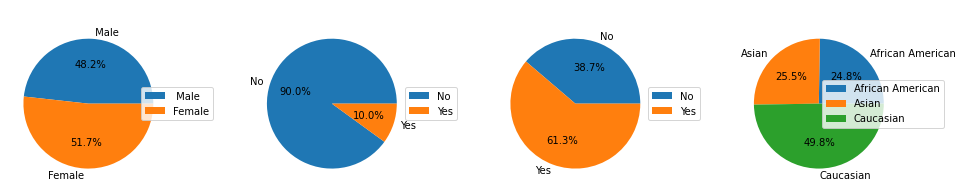

In [7]:
def show_pie(df, cols):
    # Î≤îÏ£ºÌòï Î≥ÄÏàò ÌååÏù¥Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
    fig, axs = plt.subplots(1, len(cols), figsize=[16, 16])
    fig.subplots_adjust(wspace=0.5, hspace=0.2)
    for i, col in enumerate(cols):
        grp_df = df.groupby(by=col).size()
        print(grp_df.sort_values(ascending=False)[:5])
        print('unique val count: ', len(grp_df))
        print()
        axs[i].pie(grp_df, autopct='%.1f%%', labels=grp_df.index)
        axs[i].set_title(col, color='w')
        axs[i].legend(loc='center right', bbox_to_anchor=(1.3, 0.5))

    plt.show()

# Î≤îÏ£ºÌòï Î≥ÄÏàò ÏπºÎüº
qtt_cols = ['Gender', 'Student', 'Married', 'Ethnicity']
show_pie(cr_data, qtt_cols)

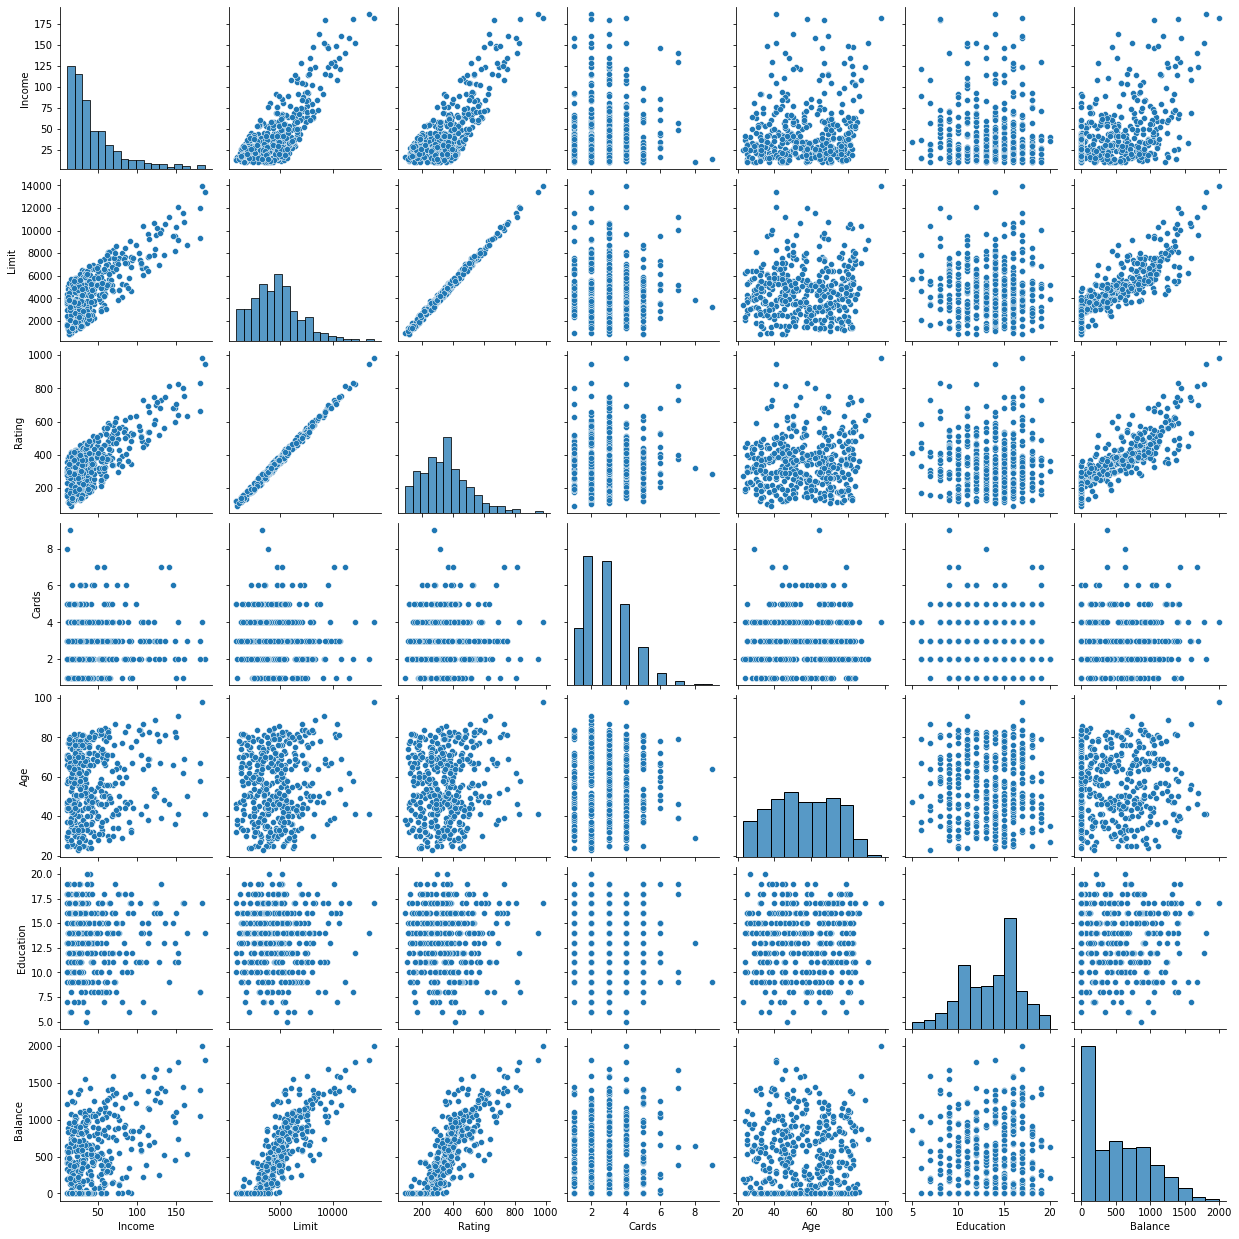

In [15]:
# data ÌäπÏÑ±ÏùÑ pairplotÏúºÎ°ú Í∞ÑÎã®Ìûà ÌôïÏù∏
sns.pairplot(cr_data[qlt_cols])

In [16]:
# Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
cr_data.corr()

Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000

In [14]:
# Stats model ÌôúÏö© Î™®Îç∏ ÌïôÏäµ Î∞è Í≤∞Í≥º ÌôïÏù∏
lm_mul = smf.ols(formula='Balance ~ Income + Limit + Rating + Cards + Age + Education + \
                 Gender + Student + Married + Ethnicity', 
                 data=cr_data).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.11e-253
Time:                        10:01:37   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""